## PCA usando spark

In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

import time

from pyspark.ml.feature import VectorSlicer
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler

from pyspark.ml.feature import PCA
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession

import findspark
findspark.init()

In [2]:
spark = SparkSession\
    .builder\
    .appName("PCA com spark")\
    .getOrCreate()

#### Essa função ira separar uma coluna de um dataframe em colunas separadas

In [3]:
def sliceFeatures(df, nValores, nomeSaidas, nomeEntrada):#dataframe / numero de colunas a serem criadas / nome das colunas de saida / ...coluna de entrada
    for i in range(nValores):
        slicer = VectorSlicer(inputCol = nomeEntrada, outputCol = nomeSaidas + str(i+1), indices=[i])
        df = slicer.transform(df)
    return df

#### Retorna um vetor correspontente a uma coluna do dataframe

In [4]:
def returnVector(df, name):#dataframe / nome da coluna , retorna um vetor da coluna especificada (df spark)
    aux = np.array(df.select(name).collect())
    aux2 = []
    for i in range(df.count()):
        aux2.append(float(aux[i]))
    return aux2

#### Função para preencher o dataframe

In [5]:
def returnDimesion(nAmostras, nTipos, rangeDaMedia):#retorna um vetor np com nAmostras, com nTipos com a mesma media, que varia de 1 a rangeDaMedia (df pandas)
    d = []
    for k in range(nTipo):
        t = np.random.poisson(lam=rd.randrange(1, rangeDaMedia), size = nAmostras)
#        t = np.random.normal(loc=rd.randrange(1, rangeDaMedia), scale=30.0, size = nAmostras) # distribuição normal    
        d = np.concatenate((d, t))
    return d   

## Argumentos

#### nDimensoes: Numero de dimensões das amostras

#### nAmostras: Numero de amostra por classes

#### nTipo: Numero "classes" das amostras

#### nComponentes: Quantas componentes serão calculadas 

#### rangeDaMedia: Limite da media na distribuição dos dados

In [6]:
nDimensoes = 5           #dimensão dos dados (tem que ser maior que 3)
nAmostras = 10           #numero de amostras por tipo  (tem que ser maior que 3)
nTipo = 3               #numero de tipos de amostras (o numero de clusters)
nComponentes = nDimensoes #quantas componentes vão ser calculadas (não precisa mudar) (tem que ser maior que 3)
rangeDaMedia = 1000       #limite da media da distribuição dos dados (bom ser grande) 

## Criando dataframe
#### Cria o dataframe com os dados que serão utilizados 

In [7]:
dimensoes = ['dimensao' + str(i) for i in range(1, nDimensoes + 1)]
#print(dimensoes)

amostras = ['amostra' + str(i) for i in range(1, nTipo * nAmostras + 1)]
#print(amostras)

aux = pd.DataFrame(columns=[*amostras], index=dimensoes)
aux.head()

,amostra1,amostra2,amostra3,amostra4,amostra5,amostra6,amostra7,amostra8,amostra9,amostra10,...,amostra21,amostra22,amostra23,amostra24,amostra25,amostra26,amostra27,amostra28,amostra29,amostra30
dimensao1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimensao2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimensao3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimensao4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimensao5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
start_time = time.time()

#### Preenchendo o dataframe com os dados gerados com os parametros, e criando um dataframe spark

In [9]:
d = dimensoes # ?
for dimensoes in aux.index:
    aux.loc[dimensoes,'amostra1':'amostra'+ str(nAmostras * nTipo)] = returnDimesion(nAmostras, nTipo, rangeDaMedia)
aux

,amostra1,amostra2,amostra3,amostra4,amostra5,amostra6,amostra7,amostra8,amostra9,amostra10,...,amostra21,amostra22,amostra23,amostra24,amostra25,amostra26,amostra27,amostra28,amostra29,amostra30
dimensao1,587,635,607,648,581,618,594,598,603,643,...,334,339,312,360,346,322,326,354,300,331
dimensao2,414,440,457,425,423,422,431,423,453,428,...,604,611,623,631,599,623,622,620,586,639
dimensao3,707,689,711,763,698,684,718,722,735,705,...,474,462,470,474,454,465,460,474,489,462
dimensao4,524,534,537,510,545,508,528,550,528,506,...,900,928,882,880,869,938,951,854,897,949
dimensao5,761,781,763,757,796,783,779,752,714,773,...,85,63,88,81,81,92,85,113,92,88


In [10]:
dimensoes = d
dataframe = spark.createDataFrame(aux.T)

/usr/local/lib/python3.6/dist-packages/pyspark/sql/session.py:714: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  An error occurred while calling z:org.apache.spark.sql.api.python.PythonSQLUtils.readArrowStreamFromFile.
: java.lang.IllegalArgumentException
	at java.nio.ByteBuffer.allocate(ByteBuffer.java:334)
	at org.apache.arrow.vector.ipc.message.MessageSerializer.readMessage(MessageSerializer.java:543)
	at org.apache.spark.sql.execution.arrow.ArrowConverters$$anon$3.readNextBatch(ArrowConverters.scala:243)
	at org.apache.spark.sql.execution.arrow.ArrowConverters$$anon$3.<init>(ArrowConverters.scala:229)
	at org.apache.spark.sql.execution.arrow.ArrowConverters$.getBatchesFromStream(ArrowConverters.scala:228)
	at org.apache.spark.sql.execution.arrow.ArrowConverters$$anonfun$readArrowStreamFromFile$2.apply(ArrowConverters.scala:216)
	at org.apache.spark.sql.execution.arrow.Arro

## Preparando os dados
#### Para dar entrada no metodo pca do spark é necessario criar uma coluna "features", essa ira conter todas as dimensões que serão usadas no algoritmo, a função VectorAssembler recebe as colunas de entrada e as une em uma coluna features, para aplicar chama-se o metodo transform

In [11]:
assembler = VectorAssembler(inputCols = dimensoes, outputCol="features")  # junta as colunas em uma coluna features
dataframe = assembler.transform(dataframe) #aplicando a transformacao

#### StandardScaler ira normalizar os dados (media zero e desvio padrão 1) o metodo fit ira ajustar o modelo e transform ira aplicar no dataframe

In [12]:
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", withStd=True, withMean=True)
scalerModel = scaler.fit(dataframe)                     #cria uma coluna scaledFeatures que é a features com media 0 e desvio padrão 1
scaledData = scalerModel.transform(dataframe)
pandas = scaledData.toPandas()
pandas.head()

/usr/local/lib/python3.6/dist-packages/pyspark/sql/dataframe.py:2111: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


,dimensao1,dimensao2,dimensao3,dimensao4,dimensao5,features,scaledFeatures
0,587.0,414.0,707.0,524.0,761.0,"[587.0, 414.0, 707.0, 524.0, 761.0]","[1.0726269269764357, 0.11365063522612176, 0.06..."
1,635.0,440.0,689.0,534.0,781.0,"[635.0, 440.0, 689.0, 534.0, 781.0]","[1.263245558945591, 0.23939176356140573, -0.03..."
2,607.0,457.0,711.0,537.0,763.0,"[607.0, 457.0, 711.0, 537.0, 763.0]","[1.1520513569635837, 0.3216071167037068, 0.083..."
3,648.0,425.0,763.0,510.0,757.0,"[648.0, 425.0, 763.0, 510.0, 757.0]","[1.3148714384372373, 0.1668488049064342, 0.365..."
4,581.0,423.0,698.0,545.0,796.0,"[581.0, 423.0, 698.0, 545.0, 796.0]","[1.048799597980291, 0.15717641041910468, 0.013..."


## Aplicando modelo
#### Aqui o modelo de pca é ajustado e aplicado no dataframe, uma coluna pcaFeatures sera adicionada a o dataframe com imagem das amostras nas componentes calculadas

In [13]:
pca = PCA(k = nComponentes, inputCol="scaledFeatures", outputCol="pcaFeatures") #cria uma coluna pcaFeatures com a imagem das amostras nas PC's 
model = pca.fit(scaledData)
result = model.transform(scaledData)

df = sliceFeatures(result,  nComponentes, 'PC-', 'pcaFeatures') #separa a coluna pcaFeatures em colunas PC-X
pc1 = returnVector(df, 'PC-1')
pc2 = returnVector(df, 'PC-2')
pc3 = returnVector(df, 'PC-3')

pandas = df.toPandas()
pandas.head()

/usr/local/lib/python3.6/dist-packages/pyspark/sql/dataframe.py:2111: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.fallback.enabled' is set to true.
  warnings.warn(msg)


,dimensao1,dimensao2,dimensao3,dimensao4,dimensao5,features,scaledFeatures,pcaFeatures,PC-1,PC-2,PC-3,PC-4,PC-5
0,587.0,414.0,707.0,524.0,761.0,"[587.0, 414.0, 707.0, 524.0, 761.0]","[1.0726269269764357, 0.11365063522612176, 0.06...","[0.5935243720441308, 1.606154981510234, 0.0632...",[0.5935243720441308],[1.606154981510234],[0.06326346304454328],[0.05748347089423389],[-0.027890942862965756]
1,635.0,440.0,689.0,534.0,781.0,"[635.0, 440.0, 689.0, 534.0, 781.0]","[1.263245558945591, 0.23939176356140573, -0.03...","[0.4489373978911009, 1.7784501050117534, 0.095...",[0.4489373978911009],[1.7784501050117534],[0.09536437820947752],[-0.07579226593267469],[-0.02183292227885436]
2,607.0,457.0,711.0,537.0,763.0,"[607.0, 457.0, 711.0, 537.0, 763.0]","[1.1520513569635837, 0.3216071167037068, 0.083...","[0.4551483270478545, 1.6802224876573084, -0.02...",[0.4551483270478545],[1.6802224876573084],[-0.0208454283161722],[-0.04673014117835356],[0.09104316488464656]
3,648.0,425.0,763.0,510.0,757.0,"[648.0, 425.0, 763.0, 510.0, 757.0]","[1.3148714384372373, 0.1668488049064342, 0.365...","[0.7122792197220815, 1.8105739803681118, -0.25...",[0.7122792197220815],[1.8105739803681118],[-0.25293141418894366],[-0.012164107592769646],[-0.05253718186270856]
4,581.0,423.0,698.0,545.0,796.0,"[581.0, 423.0, 698.0, 545.0, 796.0]","[1.048799597980291, 0.15717641041910468, 0.013...","[0.5521406816240184, 1.5640800559568415, 0.145...",[0.5521406816240184],[1.5640800559568415],[0.1456943565809491],[-0.08451630970748636],[0.03135302839273213]


## Vizualizando resultados
#### Neste grafico é possivel ver a contribuição de cada componente na distribuição dos dados

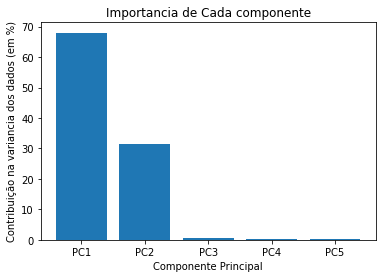

In [14]:
per_var = np.round(model.explainedVariance * 100, decimals = 1)#quanta imformação cada pc tem em %, o ultimo é zero pq ne (não sei pq ele entra)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]# labels para o grafico
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)#grafico de barras
plt.ylabel('Contribuição na variancia dos dados (em %)')
plt.xlabel('Componente Principal')
plt.title('Importancia de Cada componente')
plt.show()

#### Projeção dos dados em PC-1 e PC-2

Text(0, 0.5, 'PC2 - 31.3%')

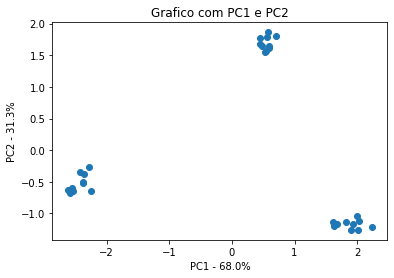

In [15]:
plt.scatter(pc1, pc2)
plt.title('Grafico com PC1 e PC2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

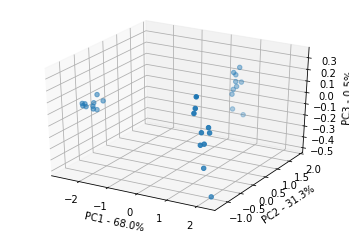

In [17]:
#Agora com PC1, PC2 e PC3
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

pc1 = returnVector(df, 'PC-1')
pc2 = returnVector(df, 'PC-2')
pc3 = returnVector(df, 'PC-3')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))
ax.set_zlabel('PC3 - {0}%'.format(per_var[2]))

pc1 = np.array(df.select('PC-1').collect())#df. (trocar coluna tags pelo nome da coluna)
pc2 = np.array(df.select('PC-2').collect())#df. (trocar coluna tags pelo nome da coluna)
pc3 = np.array(df.select('PC-3').collect())#df. (trocar coluna tags pelo nome da coluna)
ax.scatter(pc1, pc2, pc3) # OBS: Em geral a escala de PC3 é bem menor que a dos outros eixos

In [ ]:
print("Tempo de execução: {} s".format(time.time() - start_time))
spark.stop()